## Final Project Submission

Please fill out:
* Student name: Trevor Mott 
* Student pace: full time
* Scheduled project review date/time: 10/ 19  
* Instructor name: Yish 
* Blog post URL:


# Three Questions:

1. what is the corrilation of budget and gros income?
2. which studio has the best average gross income?



In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# making data frames with our csv files 
df_title_ratings = pd.read_csv('title.ratings.csv')
df_title_basics = pd.read_csv('clean_basics')
df_movie_budget = pd.read_csv('tn.movie_budgets.csv')
df_genre = pd.read_csv('tmdb.movies.csv')
df_bom_studio = pd.read_csv('bom.movie_gross.csv')


In [3]:
#Creates a function that takes in a column from a dataframe and cleans them 
def change_to_int (name_of_col , df):
    df[name_of_col] = df[name_of_col].str.replace('$','').str.replace(',','').astype(np.int64)
    
#function call for the three columns that need to be integer values

change_to_int('domestic_gross' , df_movie_budget)
change_to_int('worldwide_gross' , df_movie_budget)
change_to_int('production_budget',df_movie_budget)
df_movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


# graph of the budget vs domestic gross

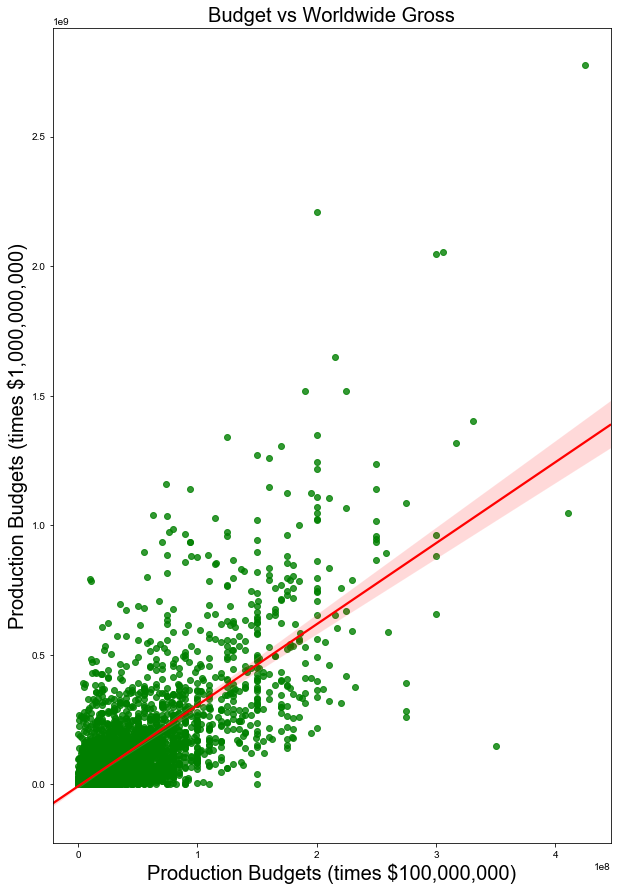

In [4]:
# sets my x and y to the data from movie budgets dataframe
y = df_movie_budget['worldwide_gross'] 
x = df_movie_budget['production_budget']
# set how big the graph is 
plt.figure(figsize = (10,15))
plt.title('Budget vs Worldwide Gross', fontsize = 20)
# makes the scatter plot 
sns.set_style('whitegrid') 
sns.regplot(x , y , scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'} )
# sets lable for scatter plots
plt.xlabel('Production Budgets (times $100,000,000)' , fontsize = 20)
plt.ylabel('Production Budgets (times $1,000,000,000)' , fontsize = 20)
# makes a line that is the corrilation of the scatter plot and plots it 
plt.show()

# graph of the budget vs domestic gross

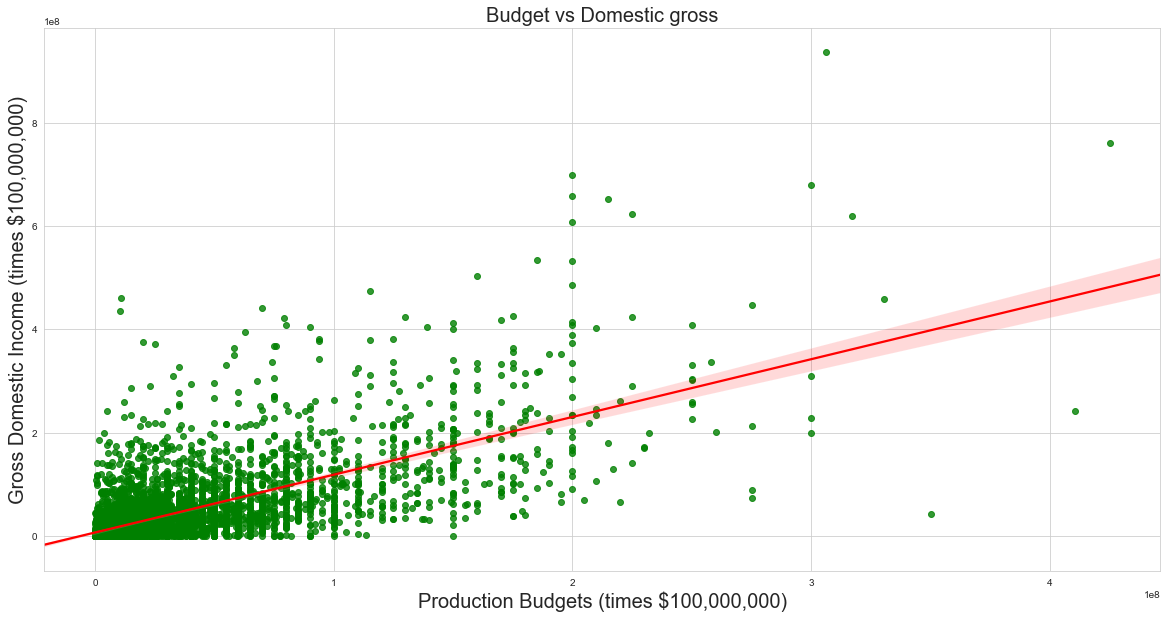

In [11]:
# sets my x and y to the data from movie budgets dataframe
x = df_movie_budget['production_budget']
y = df_movie_budget['domestic_gross']
# set how big the graph is
plt.figure(figsize = (20,10))
# makes the scatter plot
sns.set_style('whitegrid') 
sns.regplot(x , y , scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'} )
plt.title('Budget vs Domestic gross', fontsize = 20)
# sets lable for scatter plots
plt.xlabel('Production Budgets (times $100,000,000)', fontsize = 20)
plt.ylabel('Gross Domestic Income (times $100,000,000)', fontsize = 20)

plt.show()

In [6]:
#exports a csv of the clean movie budegts
df_movie_budget.to_csv('clean_movie_budgets')

# clean the bom.movie_gross.csv

In [7]:
#drops all null values in the data set 
df_bom_studio.dropna(inplace=True)
#gets rid of , on foreign gross and makes it a float 
df_bom_studio['foreign_gross'] = df_bom_studio['foreign_gross'].str.replace(',','').astype(np.float64)

In [8]:
#makes a new column of the toal gross
df_bom_studio['total'] = (df_bom_studio['domestic_gross'] + df_bom_studio['foreign_gross'])
#makes a data frame of the number of each studio
df_sum = df_bom_studio.studio.value_counts()
#aggrigates on studio
df_combined = df_bom_studio.groupby(['studio']).agg('sum')
#drops year column 
df_combined.drop(columns = 'year' , inplace = True)
#puts the total vales that are the largest at the top
df_combined = df_combined.sort_values('total', ascending=False).head(10)
#joins our combined and sum 
df_joined_bom = df_combined.join(df_sum)
#remanes studio to number_of_studio
df_joined_bom.rename (columns ={'studio' : 'number_of_studio'},inplace = True)
#makes total colum an int 
df_joined_bom['total'] = df_joined_bom['total'].astype(np.int64)
#makes a new column of ints 
df_joined_bom['average'] = (df_joined_bom['total'] / df_joined_bom['number_of_studio'])



# bar graph for average gross revenue

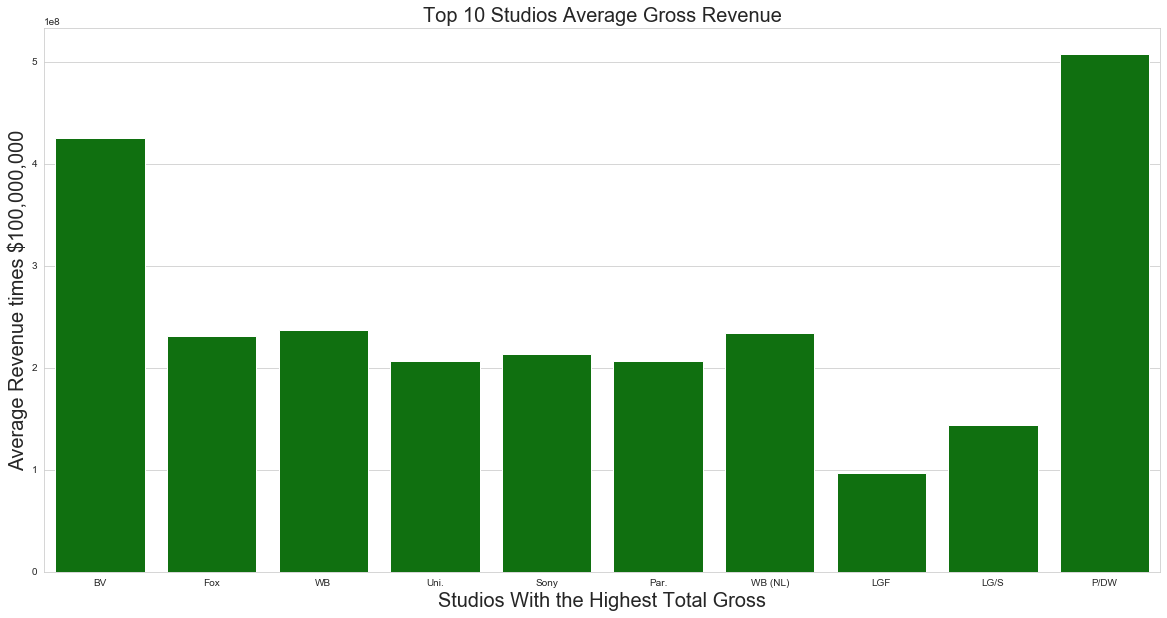

In [10]:
name = []
#creat6es a list of the top ten names from our data frame 
for x in range(0,10):
    name.append(df_joined_bom.iloc[x].name)   
price = df_joined_bom['average'].head(10) 

plt.figure(figsize = (20,10))
#makes a bar graph of the average gross income 
sns.barplot(x = name , y = price , color = 'green')
#sets names on axis 
plt.ylabel('Average Revenue times $100,000,000', fontsize = 20)
plt.xlabel('Studios With the Highest Total Gross', fontsize = 20)
#adds title 
plt.title('Top 10 Studios Average Gross Revenue' , fontsize=20)

# Show Plot 
plt.show()